In [13]:
from pathlib import Path

name = 'yolov5x6_cv04_cleandata_fold1_pseudo'
result = '/opt/ml/detection/yolov5/runs/detect/exp2'
result_path = Path(result)
result_label = list(result_path.glob('labels/*.txt'))

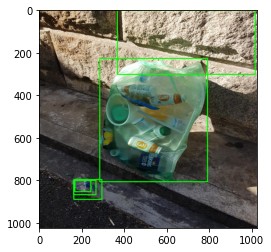

In [14]:
import matplotlib.pyplot as plt
import cv2

index = 15
img = plt.imread(f"/opt/ml/detection/dataset/test/{str(index).zfill(4)}.jpg")

with open(f"{result}/labels/{str(index).zfill(4)}.txt", 'r') as f:
    for line in f.readlines():
        label, x, y, h, w, s = map(float,line.split())
        label = int(label)
        x, y, h, w = x*1024, y*1024, h*1024, w*1024
        x1 = int(x - h/2)
        y1 = int(y - w/2)
        x2 = int(x + h/2)
        y2 = int(y + w/2)
        cv2.rectangle(img, (x1, y1), (x2, y2), (0, 255, 0), 3)

plt.imshow(img)

In [15]:
PredictionString = []
image_id = []

for i in result_label:
    image_id.append(f"test/{str(i)[-8:-4]}.jpg")
    with open(str(i),'r') as f:
        prediction = ""
        for line in f.readlines():
            label, x, y, h, w, score = map(float,line.split())
            label = int(label)
            x, y, h, w = x*1024, y*1024, h*1024, w*1024
            x1 = max(0, x - h/2)
            y1 = max(0, y - w/2)
            x2 = min(1024,x + h/2)
            y2 = min(1024, y + w/2)
            prediction += f"{label} {score} {x1} {y1} {x2} {y2} "
        PredictionString.append(prediction)      



In [16]:
import pandas as pd
data = pd.DataFrame({'image_id' : image_id,
                    'PredictionString': PredictionString,
                    })

In [17]:
data = data.sort_values(by = 'image_id')
data

,image_id,PredictionString
2127,test/0000.jpg,5 0.0100109 346.9999616 569.9995136 381.999974...
2166,test/0001.jpg,5 0.0169464 131.99974400000002 3.9997439999999...
4313,test/0002.jpg,0 0.0101888 846.999552 365.999616 1024 637.999...
2447,test/0003.jpg,9 0.0127273 0.0005119999999578795 616.0 1019.0...
1217,test/0004.jpg,0 0.0126293 267.999744 371.999744 664.99942400...
...,...,...
2605,test/4866.jpg,4 0.0141552 363.9998976 982.999808 414.9999104...
2626,test/4867.jpg,0 0.151467 633.999872 669.999616 777.999872 71...
116,test/4868.jpg,7 0.010124 613.0001920000001 453.9996159999999...
3362,test/4869.jpg,0 0.0100112 50.999296000000015 423.000064 618....


In [18]:
data.to_csv(f"/opt/ml/detection/yolov5/submission/{name}.csv", index = False)